In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
def gen_batch(batch_size=32):
    x = np.random.random(batch_size)*10-5

    sd = 0.05 + 0.1 * (x+5)
    y = np.cos(x) - 0.3 * x + np.random.randn(batch_size) * sd

    return x, y

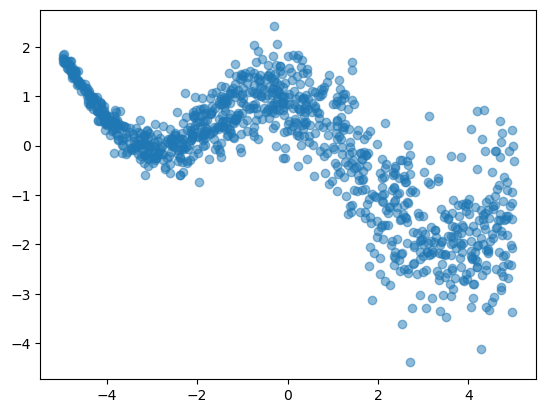

In [4]:
x, y = gen_batch(1024)
plt.scatter(x, y, alpha=0.5);

In [6]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.ann1 = nn.Sequential(
          nn.Linear(1, 10),
          nn.Tanh(),
          nn.Linear(10, 1),
        )
        self.ann2 = nn.Sequential(
          nn.Linear(1, 10),
          nn.Tanh(),
          nn.Linear(10, 1),
        )

    def forward(self, inputs):
        return self.ann1(inputs), self.ann2(inputs)

In [7]:
model = Model()

In [8]:
def criterion(outputs, targets):
    mu = outputs[0]
    v = torch.exp(outputs[1])

    c = torch.log(torch.sqrt(2 * np.pi * v))

    f = 0.5 / v * (targets - mu)**2

    nll = torch.mean(c+f)

    return nll

In [9]:
optimizer = torch.optim.Adam(model.parameters())

In [10]:
n_epochs = 5000
batch_size = 128
losses = np.zeros(n_epochs)

for i in range(n_epochs):
    x, y = gen_batch(batch_size)

    inputs = torch.from_numpy(x).float()
    targets = torch.from_numpy(y).float()

    inputs, targets = inputs.view(-1, 1), targets.view(-1, 1)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    losses[i] = loss.item()

    if i % 1000 == 0:
        print(f'Epoch {i} Loss {loss.item():.4f}')

    loss.backward()
    optimizer.step()

Epoch 0 Loss 1.4812
Epoch 1000 Loss 0.9268
Epoch 2000 Loss 0.6720
Epoch 3000 Loss 0.7092
Epoch 4000 Loss 0.6397


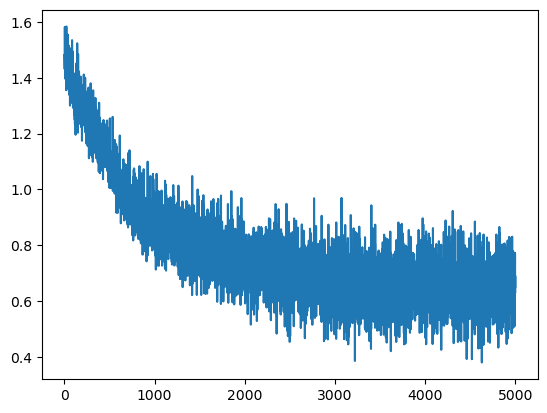

In [11]:
plt.plot(losses);

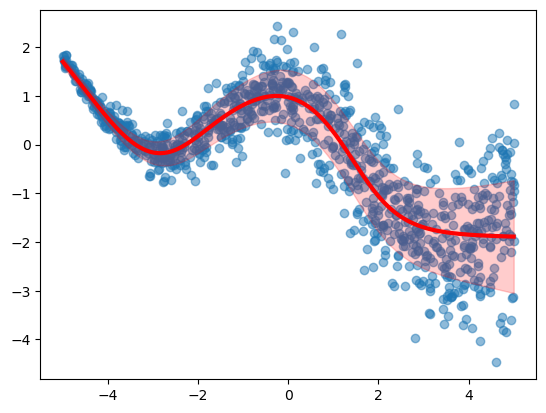

In [13]:
x, y = gen_batch(1024)
plt.scatter(x, y, alpha=0.5);

inputs = torch.from_numpy(x).float()
targets = torch.from_numpy(y).float()

inputs, targets = inputs.view(-1, 1), targets.view(-1, 1)

with torch.no_grad():
    outputs = model(inputs)
    yhat = outputs[0].numpy().flatten()
    sd = np.exp(outputs[1].numpy().flatten() /2)

idx = np.argsort(x)
plt.plot(x[idx], yhat[idx], linewidth=3, color='red')    
plt.fill_between(x[idx], yhat[idx] - sd[idx], yhat[idx] + sd[idx], color='red', alpha=0.2);
plt.show();